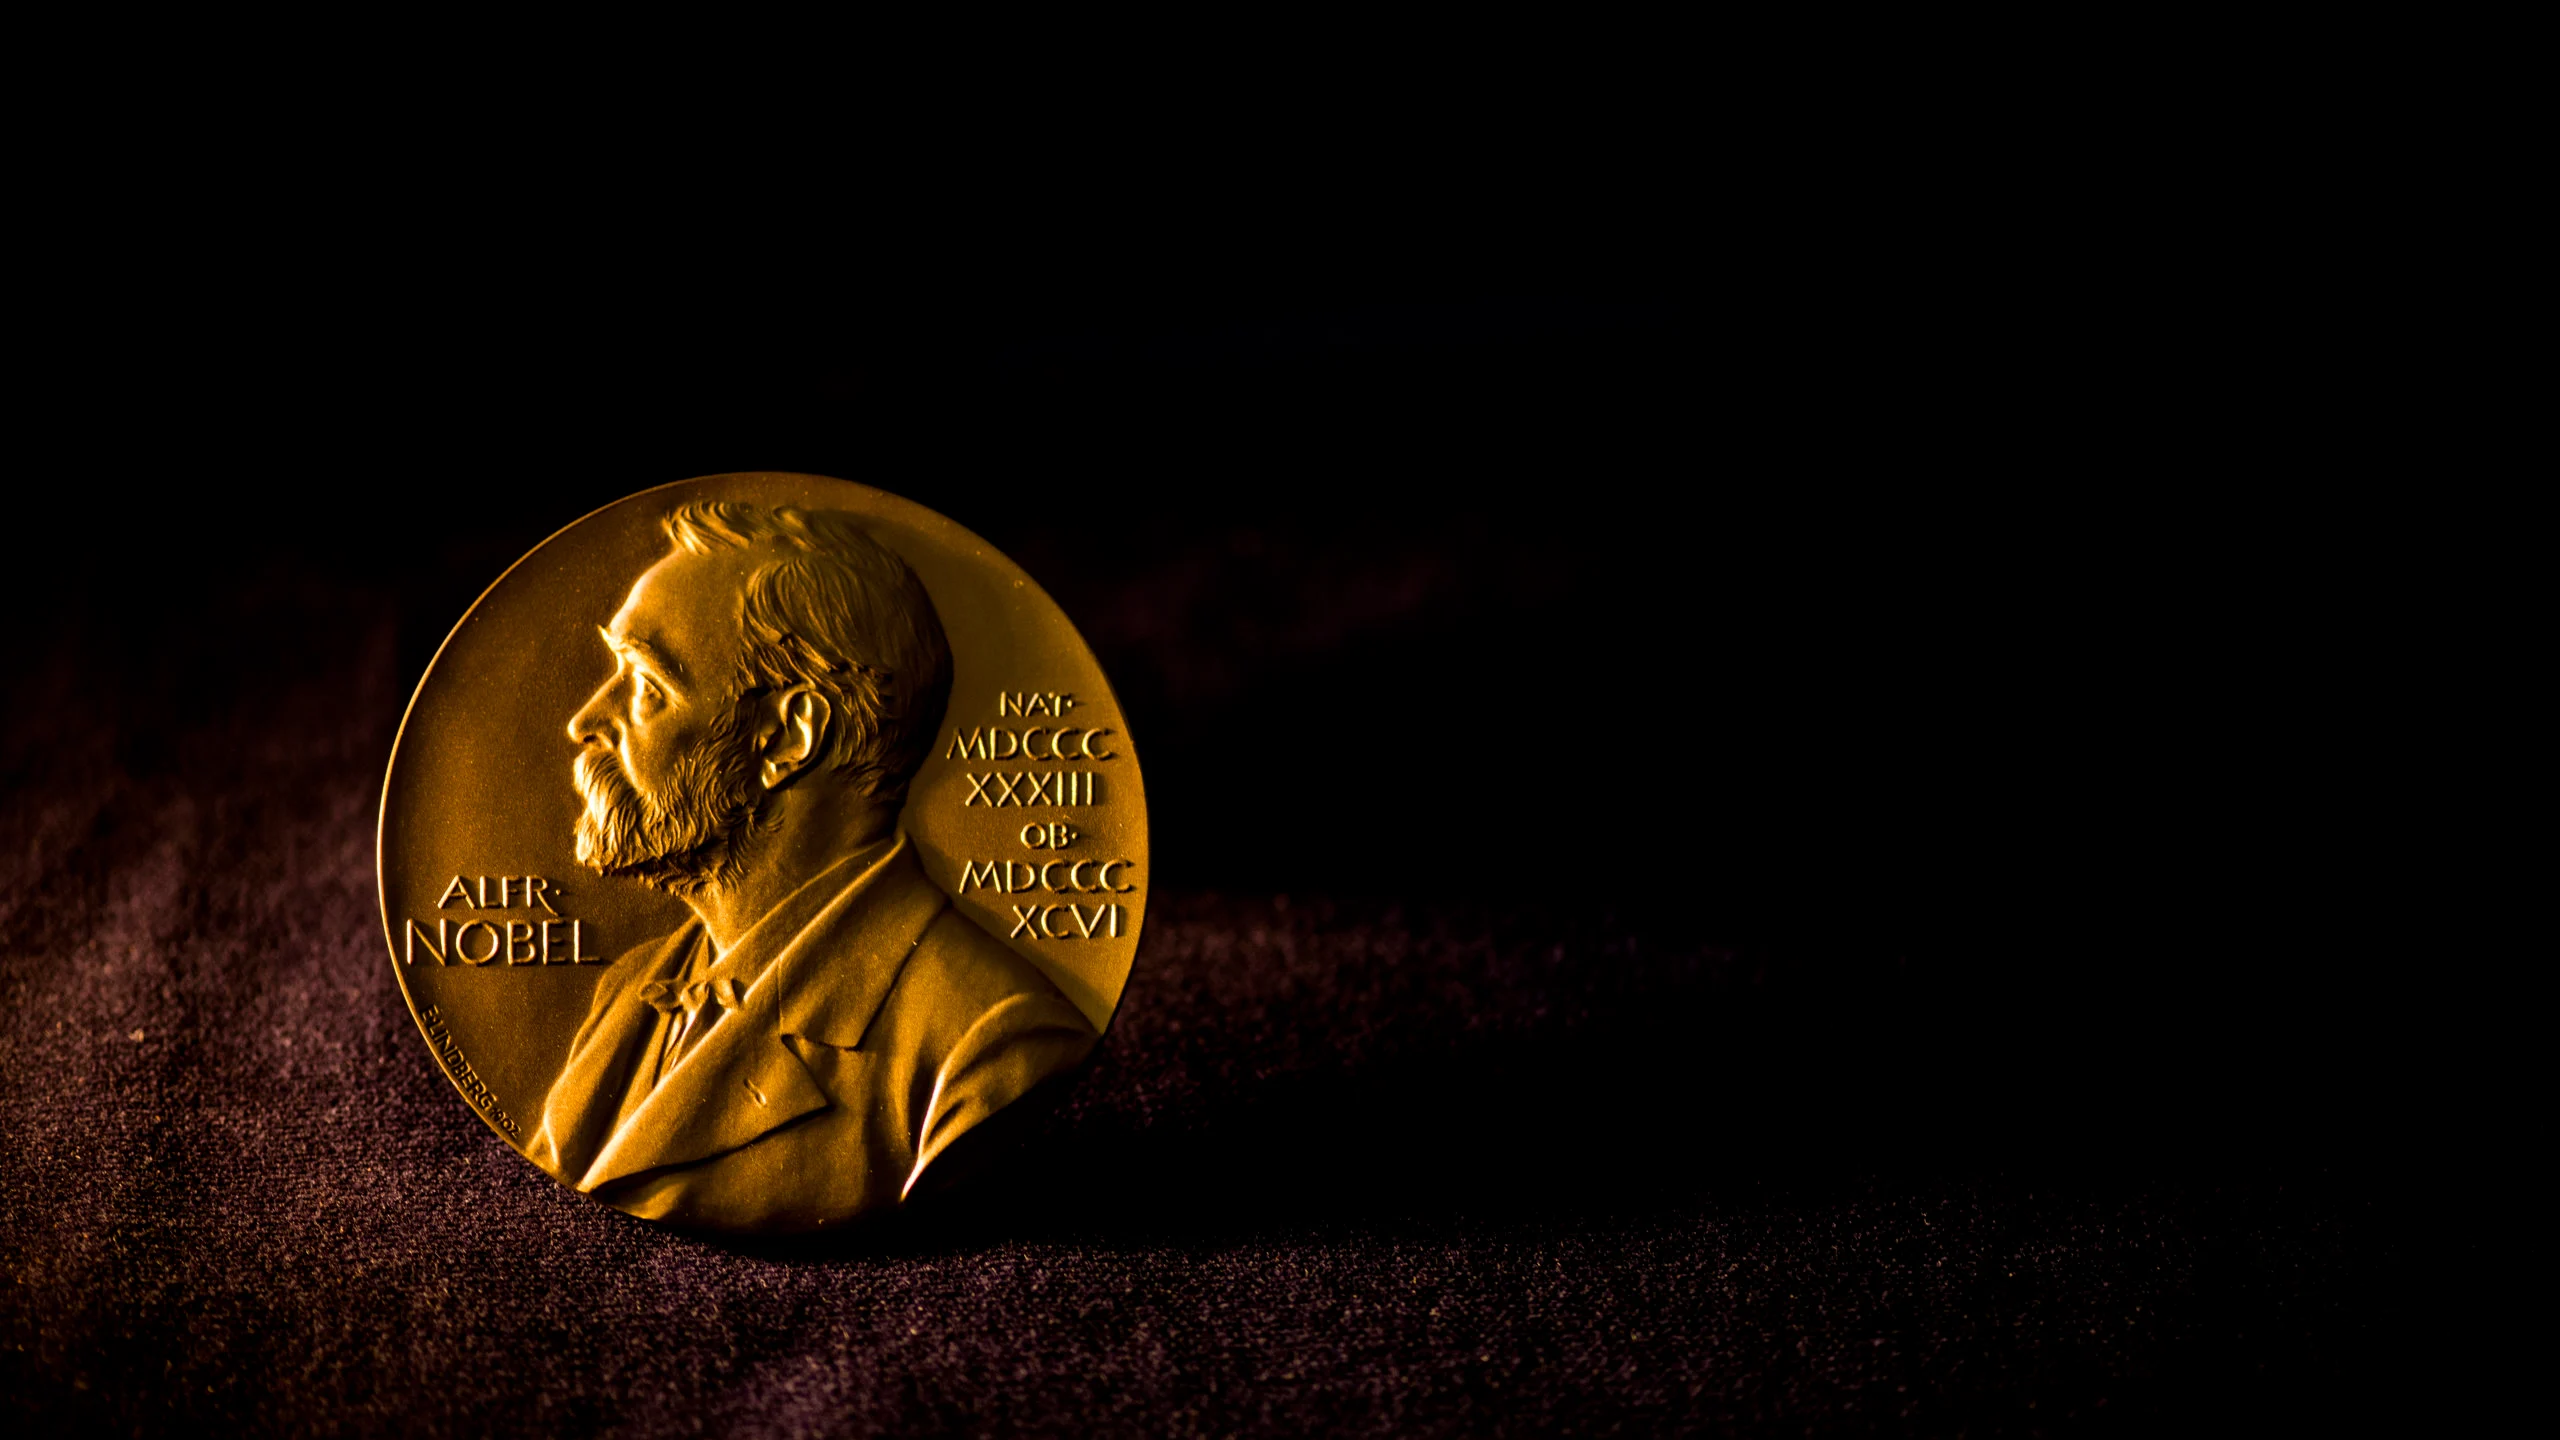

# Analysis Nobel Prize data from 1901 to 2019 using Pandas and Seaborn

As the final project of this course, I have selected Nobel Prize data from 1901 to 2019 to do an analysis using python library pandas, matplotlib and seaborn. In the first section, I will download the data frame from Kaggle, then work with the raw data to clean and prepare for the analysis. After that, I will plot data to find visual relations between different columns. Finally, I will try to answer 5 questions from the dataset.  

## Downloading the Dataset

Downloaded the data from here https://www.kaggle.com/code/yirarosas/answering-some-nobel-aspirant-questions/data

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/imdevskp/nobel-prize?select=complete.csv' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\nobel-prize" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './nobel-prize'

In [5]:
import os
os.listdir(data_dir)

['complete.csv', 'json_award.json', 'json_laureates.json']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "final_project_nobel_prize_analysis" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "didar-physics/final-project-nobel-prize-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/didar-physics/final-project-nobel-prize-analysis


'https://jovian.ai/didar-physics/final-project-nobel-prize-analysis'

## Data Preparation and Cleaning

Lets work with the data frame first. If needed we will do some cleaning or add some columns.



In [10]:
import pandas as pd

In [11]:
nobel_df_raw=pd.read_csv('./nobel-prize/complete.csv')

In [12]:
nobel_df_raw

,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,...,org_founded_country,org_founded_countryNow,org_founded_locationString,ind_or_org,residence_1,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4
0,2001,Economic Sciences,The Sveriges Riksbank Prize in Economic Scienc...,2,1/3,10000000,12295082,2001-10-10,received,for their analyses of markets with asymmetric ...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Stanford University, Stanford, CA, USA",NaN,NaN,NaN
1,1975,Physics,The Nobel Prize in Physics,1,1/3,630000,3404179,1975-10-17,received,for the discovery of the connection between co...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Niels Bohr Institute, Copenhagen, Denmark",NaN,NaN,NaN
2,2004,Chemistry,The Nobel Prize in Chemistry,1,1/3,10000000,11762861,2004-10-06,received,for the discovery of ubiquitin-mediated protei...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Technion - Israel Institute of Technology, Hai...",NaN,NaN,NaN
3,1982,Chemistry,The Nobel Prize in Chemistry,1,1,1150000,3102518,1982-10-18,received,for his development of crystallographic electr...,...,NaN,NaN,NaN,Individual,NaN,NaN,"MRC Laboratory of Molecular Biology, Cambridge...",NaN,NaN,NaN
4,1979,Physics,The Nobel Prize in Physics,2,1/3,800000,2988048,1979-10-15,received,for their contributions to the theory of the u...,...,NaN,NaN,NaN,Individual,NaN,NaN,"International Centre for Theoretical Physics, ...","Imperial College, London, United Kingdom",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,1972,Physics,The Nobel Prize in Physics,1,1/3,480000,3345725,NaN,received,for their jointly developed theory of supercon...,...,NaN,NaN,NaN,Individual,NaN,NaN,"University of Illinois, Urbana, IL, USA",NaN,NaN,NaN
946,1954,Chemistry,The Nobel Prize in Chemistry,1,1,181647,2640218,NaN,received,for his research into the nature of the chemic...,...,NaN,NaN,NaN,Individual,NaN,NaN,"California Institute of Technology (Caltech), ...",NaN,NaN,NaN
947,1911,Chemistry,The Nobel Prize in Chemistry,1,1,140695,7327865,NaN,received,in recognition of her services to the advancem...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Sorbonne University, Paris, France",NaN,NaN,NaN
948,1981,Peace,The Nobel Peace Prize,1,1,1000000,2929688,1981-10-14,received,for promoting the fundamental rights of refugees,...,Switzerland,Switzerland,"Geneva, Switzerland",Organization,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
nobel_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   awardYear                   950 non-null    int64 
 1   category                    950 non-null    object
 2   categoryFullName            950 non-null    object
 3   sortOrder                   950 non-null    int64 
 4   portion                     950 non-null    object
 5   prizeAmount                 950 non-null    int64 
 6   prizeAmountAdjusted         950 non-null    int64 
 7   dateAwarded                 533 non-null    object
 8   prizeStatus                 950 non-null    object
 9   motivation                  950 non-null    object
 10  categoryTopMotivation       20 non-null     object
 11  award_link                  950 non-null    object
 12  id                          950 non-null    int64 
 13  name                        950 non-null    object

In [14]:
nobel_df_raw=nobel_df_raw.sort_values("awardYear")
nobel_df_raw.sample(5)

,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,...,org_founded_country,org_founded_countryNow,org_founded_locationString,ind_or_org,residence_1,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4
127,1917,Physics,The Nobel Prize in Physics,1,1,133823,3920596,1918-11-12,received,for his discovery of the characteristic R&ouml...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Edinburgh University, Edinburgh, United Kingdom",NaN,NaN,NaN
382,1958,Physics,The Nobel Prize in Physics,2,1/3,214559,2646698,NaN,received,for the discovery and the interpretation of th...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Lomonosov Moscow State University, Moscow, USS...","P.N. Lebedev Physical Institute, Moscow, USSR ...",NaN,NaN
305,1983,Economic Sciences,The Sveriges Riksbank Prize in Economic Scienc...,1,1,1500000,3715324,1983-10-17,received,for having incorporated new analytical methods...,...,NaN,NaN,NaN,Individual,NaN,NaN,"University of California, Berkeley, CA, USA",NaN,NaN,NaN
403,1961,Literature,The Nobel Prize in Literature,1,1,250233,2878447,NaN,received,for the epic force with which he has traced th...,...,NaN,NaN,NaN,Individual,Yugoslavia (now N/A),NaN,NaN,NaN,NaN,NaN
540,1957,Peace,The Nobel Peace Prize,1,1,208629,2697789,1957-10-03,received,for his crucial contribution to the deployment...,...,NaN,NaN,NaN,Individual,Canada,NaN,NaN,NaN,NaN,NaN


In [15]:
nobel_df_raw.describe()

,awardYear,sortOrder,prizeAmount,prizeAmountAdjusted,id
count,950.000000,950.000000,9.500000e+02,9.500000e+02,950.000000
mean,1971.207368,1.483158,3.460596e+06,6.145681e+06,483.043158
std,33.586969,0.688021,4.014530e+06,3.276874e+06,282.644711
min,1901.000000,1.000000,1.149350e+05,2.377268e+06,1.000000
25%,1947.000000,1.000000,1.703320e+05,3.052326e+06,238.250000
50%,1977.000000,1.000000,7.000000e+05,4.997406e+06,477.500000
75%,2000.000000,2.000000,8.000000e+06,9.044276e+06,727.750000
max,2019.000000,3.000000,1.000000e+07,1.229508e+07,984.000000


In [16]:
nobel_df_raw.columns

Index(['awardYear', 'category', 'categoryFullName', 'sortOrder', 'portion',
       'prizeAmount', 'prizeAmountAdjusted', 'dateAwarded', 'prizeStatus',
       'motivation', 'categoryTopMotivation', 'award_link', 'id', 'name',
       'knownName', 'givenName', 'familyName', 'fullName', 'penName', 'gender',
       'laureate_link', 'birth_date', 'birth_city', 'birth_cityNow',
       'birth_continent', 'birth_country', 'birth_countryNow',
       'birth_locationString', 'death_date', 'death_city', 'death_cityNow',
       'death_continent', 'death_country', 'death_countryNow',
       'death_locationString', 'orgName', 'nativeName', 'acronym',
       'org_founded_date', 'org_founded_city', 'org_founded_cityNow',
       'org_founded_continent', 'org_founded_country',
       'org_founded_countryNow', 'org_founded_locationString', 'ind_or_org',
       'residence_1', 'residence_2', 'affiliation_1', 'affiliation_2',
       'affiliation_3', 'affiliation_4'],
      dtype='object')

# Now we will do some data clean up

In [17]:
nobel_df_raw.nunique()

awardYear                     116
category                        6
categoryFullName                6
sortOrder                       3
portion                         4
prizeAmount                    98
prizeAmountAdjusted           114
dateAwarded                   257
prizeStatus                     3
motivation                    664
categoryTopMotivation           8
award_link                    597
id                            943
name                          943
knownName                     919
givenName                     704
familyName                    866
fullName                      919
penName                        11
gender                          2
laureate_link                 943
birth_date                    906
birth_city                    626
birth_cityNow                 623
birth_continent                 6
birth_country                  95
birth_countryNow               82
birth_locationString          645
death_date                    619
death_city    

In [18]:
nobel_df = nobel_df_raw.drop(columns=['categoryFullName','id','ind_or_org','birth_cityNow','affiliation_4',
                                      'affiliation_2','affiliation_3','birth_locationString','death_city',
                                      'death_continent','death_countryNow','death_locationString','nativeName',
                                      'org_founded_date','org_founded_city','org_founded_cityNow','org_founded_countryNow',
                                      'org_founded_locationString','motivation','categoryTopMotivation',
                                      'knownName','givenName','familyName','penName','acronym',
                                      'residence_1','residence_2','dateAwarded','award_link','birth_city',
                                      'laureate_link','death_cityNow' ],axis=1)

In [19]:
nobel_df

,awardYear,category,sortOrder,portion,prizeAmount,prizeAmountAdjusted,prizeStatus,name,fullName,gender,birth_date,birth_continent,birth_country,birth_countryNow,death_date,death_country,orgName,org_founded_continent,org_founded_country,affiliation_1
415,1901,Chemistry,1,1,150782,8567159,received,Jacobus H. van 't Hoff,Jacobus Henricus van 't Hoff,male,1852-08-30,Europe,the Netherlands,the Netherlands,1911-03-01,Germany,NaN,NaN,NaN,"Berlin University, Berlin, Germany"
836,1901,Literature,1,1,150782,8567159,received,Sully Prudhomme,Sully Prudhomme,male,1839-03-16,Europe,France,France,1907-09-07,France,NaN,NaN,NaN,NaN
260,1901,Peace,2,1/2,150782,8567159,received,Frédéric Passy,Frédéric Passy,male,1822-05-20,Europe,France,France,1912-06-12,France,NaN,NaN,NaN,NaN
211,1901,Physiology or Medicine,1,1,150782,8567159,received,Emil von Behring,Emil Adolf von Behring,male,1854-03-15,Europe,Prussia,Poland,1917-03-31,Germany,NaN,NaN,NaN,"Marburg University, Marburg, Germany"
901,1901,Physics,1,1,150782,8567159,received,Wilhelm Conrad Röntgen,Wilhelm Conrad Röntgen,male,1845-03-27,Europe,Prussia,Germany,1923-02-10,Germany,NaN,NaN,NaN,"Munich University, Munich, Germany"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,2019,Chemistry,2,1/3,9000000,9000000,received,M. Stanley Whittingham,M. Stanley Whittingham,male,1941-12-22,Europe,United Kingdom,United Kingdom,NaN,NaN,NaN,NaN,NaN,"Binghamton University, State University of New..."
456,2019,Chemistry,1,1/3,9000000,9000000,received,John B. Goodenough,John B. Goodenough,male,1922-07-25,Europe,Germany,Germany,NaN,NaN,NaN,NaN,NaN,"University of Texas, Austin, TX, USA"
918,2019,Physiology or Medicine,1,1/3,9000000,9000000,received,William G. Kaelin Jr,William G. Kaelin Jr,male,1957-11-23,North America,USA,USA,NaN,NaN,NaN,NaN,NaN,"Harvard Medical School, Boston, MA, USA"
322,2019,Physiology or Medicine,3,1/3,9000000,9000000,received,Gregg L. Semenza,Gregg L. Semenza,male,1956-07-12,North America,USA,USA,NaN,NaN,NaN,NaN,NaN,"Johns Hopkins University, Baltimore, MD, USA"


In [20]:
nobel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 415 to 601
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   awardYear              950 non-null    int64 
 1   category               950 non-null    object
 2   sortOrder              950 non-null    int64 
 3   portion                950 non-null    object
 4   prizeAmount            950 non-null    int64 
 5   prizeAmountAdjusted    950 non-null    int64 
 6   prizeStatus            950 non-null    object
 7   name                   950 non-null    object
 8   fullName               923 non-null    object
 9   gender                 923 non-null    object
 10  birth_date             923 non-null    object
 11  birth_continent        923 non-null    object
 12  birth_country          923 non-null    object
 13  birth_countryNow       923 non-null    object
 14  death_date             630 non-null    object
 15  death_country        

In [21]:
nobel_df.birth_date

415    1852-08-30
836    1839-03-16
260    1822-05-20
211    1854-03-15
901    1845-03-27
          ...    
559    1941-12-22
456    1922-07-25
918    1957-11-23
322    1956-07-12
601    1942-01-12
Name: birth_date, Length: 950, dtype: object

In [22]:
#if date index has null value needs to use errors='coerce'
nobel_df['birth_date'] = pd.to_datetime(nobel_df['birth_date'], errors='coerce')

In [23]:
nobel_df.birth_date

415   1852-08-30
836   1839-03-16
260   1822-05-20
211   1854-03-15
901   1845-03-27
         ...    
559   1941-12-22
456   1922-07-25
918   1957-11-23
322   1956-07-12
601   1942-01-12
Name: birth_date, Length: 950, dtype: datetime64[ns]

In [24]:
nobel_df['year']=pd.DatetimeIndex(nobel_df.birth_date).year

In [25]:
nobel_df['age_awarded']=nobel_df['awardYear']-nobel_df['year']

In [26]:
nobel_df.name[nobel_df.age_awarded.idxmax()]

'John B. Goodenough'

In [27]:
import jovian

In [28]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "didar-physics/final-project-nobel-prize-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/didar-physics/final-project-nobel-prize-analysis


'https://jovian.ai/didar-physics/final-project-nobel-prize-analysis'

## Exploratory Analysis and Visualization

In this section we will visualize the data to find some correlation between columns.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [29]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Lets visualize  which country got how many Nobel prize. 

In [30]:
nobel_df.head(5)

,awardYear,category,sortOrder,portion,prizeAmount,prizeAmountAdjusted,prizeStatus,name,fullName,gender,...,birth_country,birth_countryNow,death_date,death_country,orgName,org_founded_continent,org_founded_country,affiliation_1,year,age_awarded
415,1901,Chemistry,1,1,150782,8567159,received,Jacobus H. van 't Hoff,Jacobus Henricus van 't Hoff,male,...,the Netherlands,the Netherlands,1911-03-01,Germany,NaN,NaN,NaN,"Berlin University, Berlin, Germany",1852.0,49.0
836,1901,Literature,1,1,150782,8567159,received,Sully Prudhomme,Sully Prudhomme,male,...,France,France,1907-09-07,France,NaN,NaN,NaN,NaN,1839.0,62.0
260,1901,Peace,2,1/2,150782,8567159,received,Frédéric Passy,Frédéric Passy,male,...,France,France,1912-06-12,France,NaN,NaN,NaN,NaN,1822.0,79.0
211,1901,Physiology or Medicine,1,1,150782,8567159,received,Emil von Behring,Emil Adolf von Behring,male,...,Prussia,Poland,1917-03-31,Germany,NaN,NaN,NaN,"Marburg University, Marburg, Germany",1854.0,47.0
901,1901,Physics,1,1,150782,8567159,received,Wilhelm Conrad Röntgen,Wilhelm Conrad Röntgen,male,...,Prussia,Germany,1923-02-10,Germany,NaN,NaN,NaN,"Munich University, Munich, Germany",1845.0,56.0


In [31]:
top_nobel_country=nobel_df.birth_countryNow.value_counts().head(20)

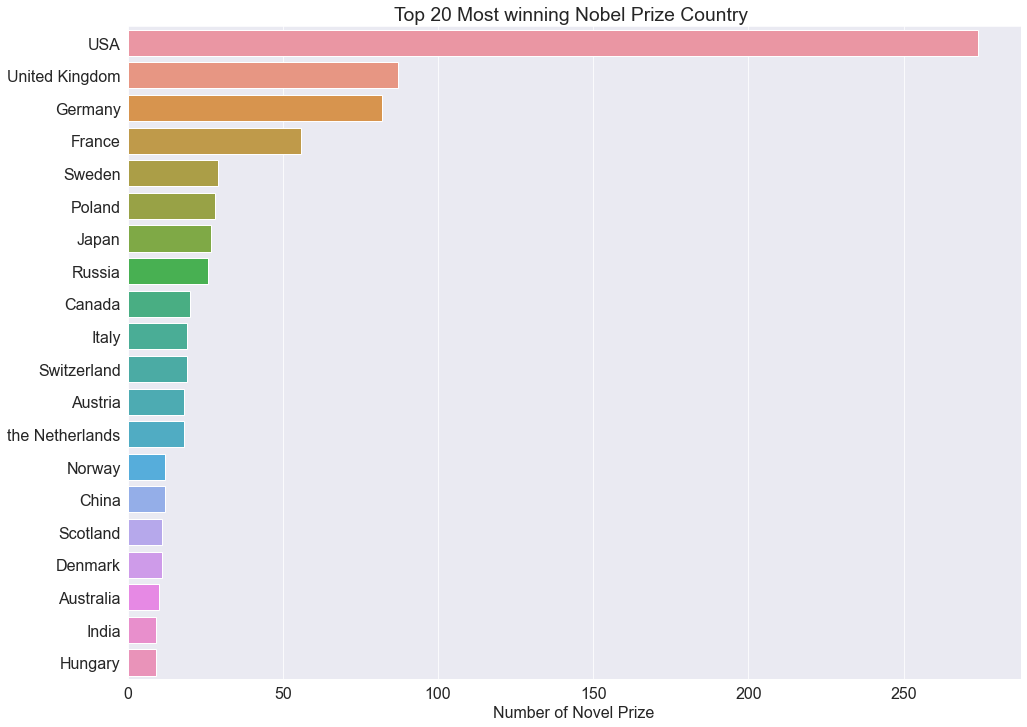

In [32]:
plt.figure(figsize=(16,12))
#plt.xticks(rotation=75)
plt.title("Top 20 Most winning Nobel Prize Country ")
sns.barplot(x=top_nobel_country, y=top_nobel_country.index);
plt.xlabel('Number of Novel Prize');

## Nobel Prize based on Catagory

In [33]:
total_prize_catagory=nobel_df.category.value_counts()

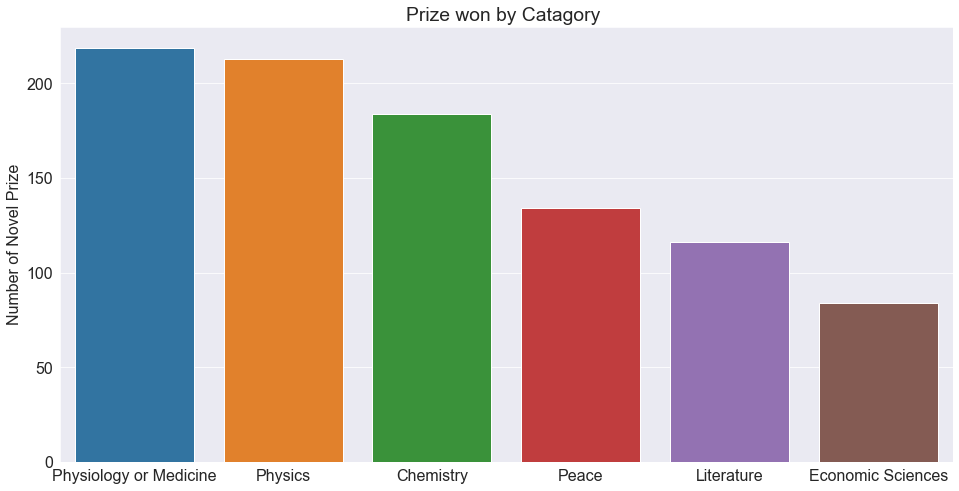

In [34]:
plt.figure(figsize=(16,8))
#plt.xticks(rotation=75)
plt.title("Prize won by Catagory ")
sns.barplot(x=total_prize_catagory.index, y=total_prize_catagory);
plt.ylabel('Number of Novel Prize');

## Novel prize based on gender

In [35]:
nobel_df['gender'].fillna('organisation' , inplace = True)

In [36]:
gender_count=nobel_df.gender.value_counts()
gender_count

male            869
female           54
organisation     27
Name: gender, dtype: int64

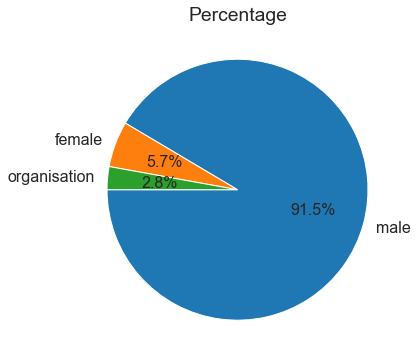

In [37]:
plt.figure(figsize=(12,6))
plt.title('Percentage')
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%',  startangle=180);

In [66]:
import plotly.express as px
fig = px.histogram(nobel_df, 
                   x='category', 
                   color='gender', 
                   color_discrete_sequence=['green', 'red','blue'], 
                   title='Prize won in different category based on Gender')
fig.update_layout(bargap=0.1)
fig.show()

## Nobel Prize based on Continent 

In [38]:
continet_count=nobel_df.birth_continent.value_counts()

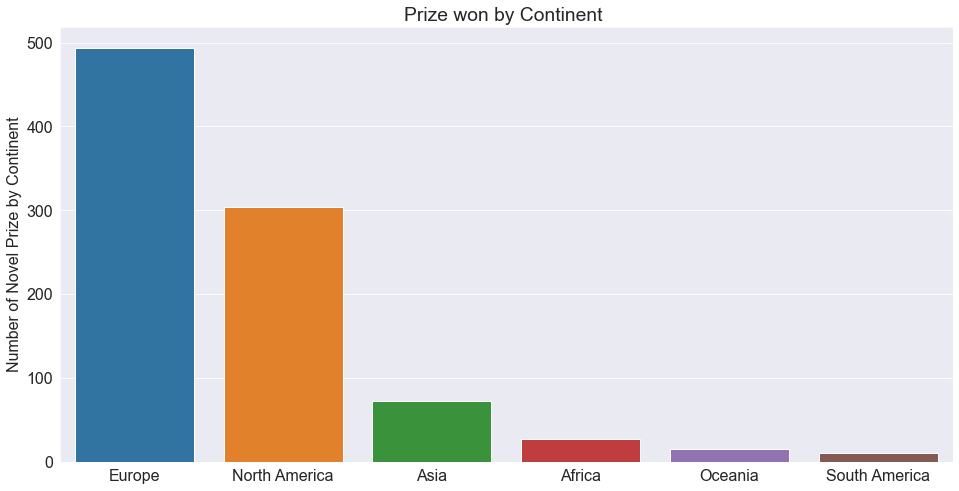

In [70]:
plt.figure(figsize=(16,8))
#plt.xticks(rotation=75)
plt.title("Prize won by Continent ")
sns.barplot(x=continet_count.index, y=continet_count);
plt.ylabel('Number of Novel Prize by Continent');

In [75]:
fig = px.histogram(nobel_df, 
                   x='birth_continent', 
                   color='category', 
                   color_discrete_sequence=['green', 'red','blue','magenta','orange','purple'], 
                   title='Prize won in different Continent based on Category')
fig.update_layout(bargap=0.1)
fig.show()

## Top 20 Institute in terms of Nobel Prize winner

In [40]:
org_count=nobel_df.affiliation_1.value_counts().head(20)
org_count

Harvard University, Cambridge, MA, USA                             27
Massachusetts Institute of Technology (MIT), Cambridge, MA, USA    20
Stanford University, Stanford, CA, USA                             18
University of Chicago, Chicago, IL, USA                            18
University of California, Berkeley, CA, USA                        17
University of Cambridge, Cambridge, United Kingdom                 17
California Institute of Technology (Caltech), Pasadena, CA, USA    17
Columbia University, New York, NY, USA                             16
Princeton University, Princeton, NJ, USA                           15
Rockefeller University, New York, NY, USA                          12
MRC Laboratory of Molecular Biology, Cambridge, United Kingdom     10
University of Oxford, Oxford, United Kingdom                        9
Cornell University, Ithaca, NY, USA                                 8
Yale University, New Haven, CT, USA                                 8
Harvard Medical Scho

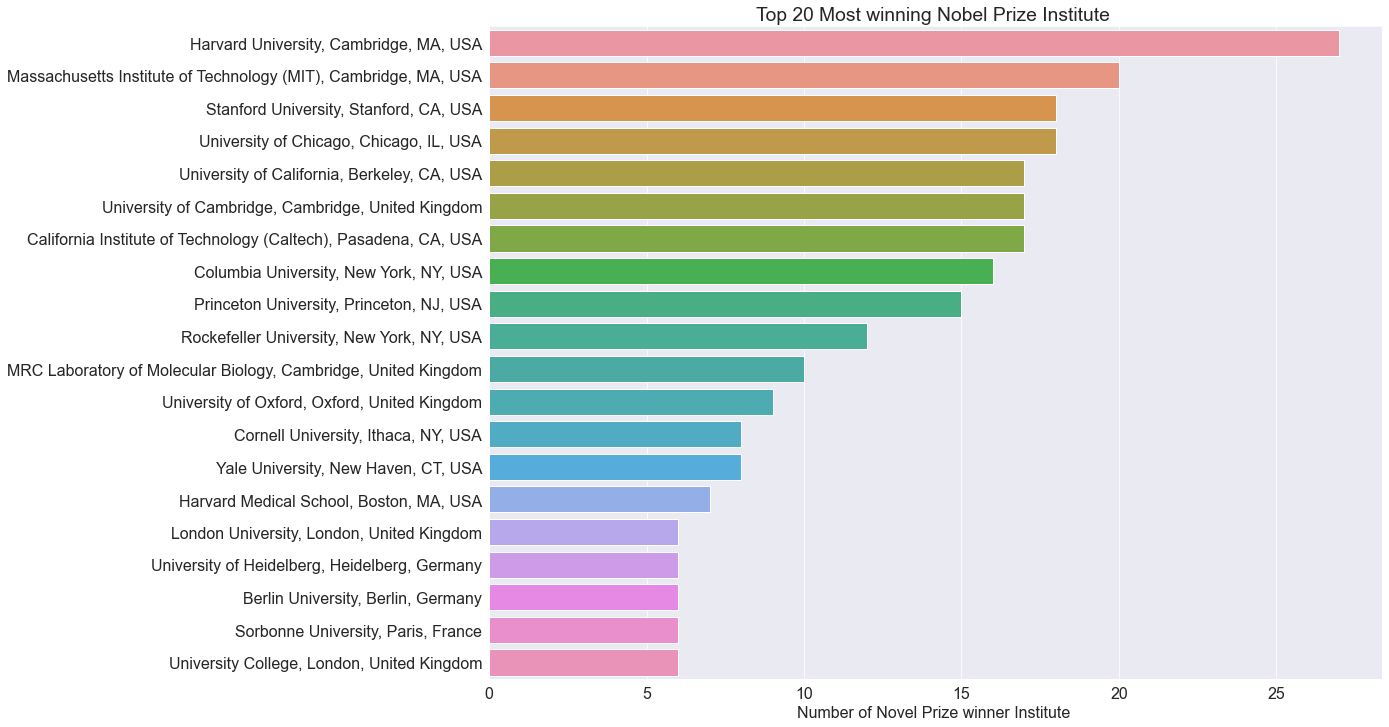

In [41]:
plt.figure(figsize=(16,12))
#plt.xticks(rotation=75)
plt.title("Top 20 Most winning Nobel Prize Institute ")
sns.barplot(x=org_count, y=org_count.index);
plt.xlabel('Number of Novel Prize winner Institute ');

Let us save and upload our work to Jovian before continuing

In [42]:
import jovian

In [43]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "didar-physics/final-project-nobel-prize-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/didar-physics/final-project-nobel-prize-analysis


'https://jovian.ai/didar-physics/final-project-nobel-prize-analysis'

## Asking and Answering Questions

Here lets try to get some information from the Nobel dataframe by asking few questions.



#### Q1:  How many people or organizations won Nobel prize twice?

In [44]:
v = nobel_df.name.value_counts()
nobel_df.name[nobel_df.name.isin(v.index[v.gt(1)])].value_counts()

International Committee of the Red Cross                       3
Marie Curie                                                    2
Linus Pauling                                                  2
Office of the United Nations High Commissioner for Refugees    2
John Bardeen                                                   2
Frederick Sanger                                               2
Name: name, dtype: int64

#### Q2: Is there anyone who refused to take the Nobel prize, if yes please write their name?

In [45]:
nobel_df['prizeStatus'].value_counts()

received      947
declined        2
restricted      1
Name: prizeStatus, dtype: int64

In [46]:
refuse= nobel_df[nobel_df['prizeStatus']=='declined'].index.values
print(nobel_df.name[refuse].to_string(index=False))

Jean-Paul Sartre
     Le Duc Tho 


In [47]:
denied= nobel_df[nobel_df['prizeStatus']=='restricted'].index.values
print(nobel_df.name[denied].to_string(index=False))

Boris Pasternak


**Jean-Paul Sartre** and  **Le Duc Tho** declined to take nobel prize and **Boris Pasternak** had been denied to take it.

#### Q3: How many organization so far win the Nobel Prize?

In [48]:
nobel_df.orgName.value_counts()

International Committee of the Red Cross                       3
Office of the United Nations High Commissioner for Refugees    2
Institute of International Law                                 1
Pugwash Conferences on Science and World Affairs               1
National Dialogue Quartet                                      1
Organisation for the Prohibition of Chemical Weapons           1
European Union (EU)                                            1
Intergovernmental Panel on Climate Change                      1
Grameen Bank                                                   1
International Atomic Energy Agency                             1
United Nations                                                 1
Médecins Sans Frontières                                       1
International Campaign to Ban Landmines                        1
United Nations Peacekeeping Forces                             1
Permanent International Peace Bureau                           1
International Physicians 

#### Q4: Who is the youngest to win the Nobel prize?

In [49]:
age_yon  = nobel_df.age_awarded.min()
name_yon = nobel_df.name[nobel_df.age_awarded.idxmin()]
category_yon = nobel_df.category[nobel_df.age_awarded.idxmin()]

In [50]:
print(f'{name_yon} is the youngest person to win the Nobel prize at age {age_yon} in {category_yon}')

Malala Yousafzai is the youngest person to win the Nobel prize at age 17.0 in Peace


#### Q5: Who is the oldest to win the prize? 

In [51]:
age_old  = nobel_df.age_awarded.max()
name_old = nobel_df.name[nobel_df.age_awarded.idxmax()]
category_old = nobel_df.category[nobel_df.age_awarded.idxmax()]

In [52]:
print(f'{name_old} is the oldest person to win the Nobel prize at age {age_old} in {category_old}')

John B. Goodenough is the oldest person to win the Nobel prize at age 97.0 in Chemistry


Let us save and upload our work to Jovian before continuing.

In [53]:
import jovian

In [54]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "didar-physics/final-project-nobel-prize-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/didar-physics/final-project-nobel-prize-analysis


'https://jovian.ai/didar-physics/final-project-nobel-prize-analysis'

## Inferences and Conclusion

Here is an short data analysis on Nobel prize winner from 1901 to 2019 using Pandas library. To visulation I use python libraries Matplotlib and Seaborn. We have found that majorty of the winner are from USA. Moreover Nobel prize is extremly male dominated

In [55]:
import jovian

In [56]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "didar-physics/final-project-nobel-prize-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/didar-physics/final-project-nobel-prize-analysis


'https://jovian.ai/didar-physics/final-project-nobel-prize-analysis'

## References and Future Work

Data for Noble prize

1. https://www.nobelprize.org/
2. https://www.kaggle.com/code/yirarosas/answering-some-nobel-aspirant-questions/data
3. https://public.opendatasoft.com/explore/dataset/nobel-prize-laureates/table/?disjunctive.category

Pandas Tutorial

4. https://pandas.pydata.org/docs/getting_started/tutorials.html
5. https://www.youtube.com/watch?v=MMirDY9AUEg&t=5980s

Matplotlib and Seaborn Tutorial

6. https://seaborn.pydata.org/
7. https://matplotlib.org/
8. https://www.youtube.com/watch?v=tuDcsAxxOR8&ab_channel=Jovian

In [57]:
import jovian

In [58]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "didar-physics/final-project-nobel-prize-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/didar-physics/final-project-nobel-prize-analysis


'https://jovian.ai/didar-physics/final-project-nobel-prize-analysis'